In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
print("done")

done


In [12]:
conn=sqlite3.connect("sales_data.db")
cur=conn.cursor()

In [14]:
# Create table
cur.execute('''
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [16]:
# Insert sample data
sample_data = [
    ('Apples', 10, 1.5),
    ('Bananas', 5, 0.8),
    ('Oranges', 8, 1.2),
    ('Apples', 7, 1.5),
    ('Bananas', 3, 0.8),
    ('Oranges', 6, 1.2)
]
cur.executemany('INSERT INTO sales VALUES (?, ?, ?)', sample_data)
conn.commit()

In [25]:
query = '''
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
'''


In [26]:
import pandas as pd

# Run query and load into DataFrame
df = pd.read_sql_query(query, conn)
print(df)


   product  total_quantity  total_revenue
0   Apples              17           25.5
1  Bananas               8            6.4
2  Oranges              14           16.8


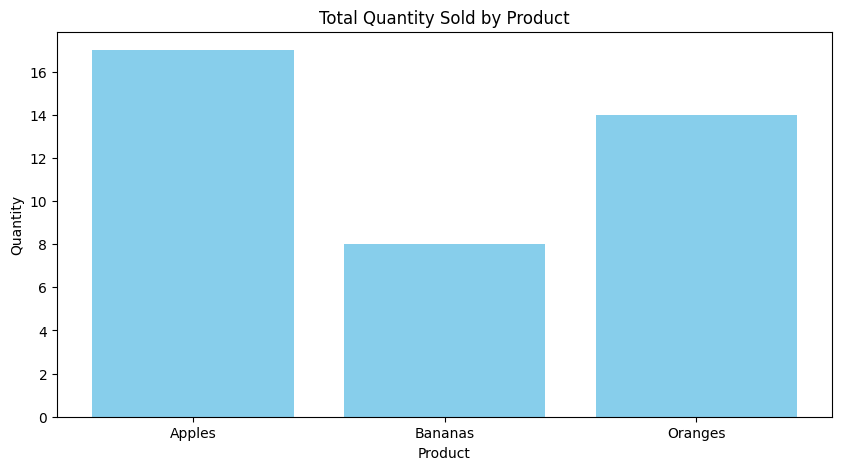

In [27]:

# Plot total quantity
plt.figure(figsize=(10, 5))
plt.bar(df['product'], df['total_quantity'], color='skyblue')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()


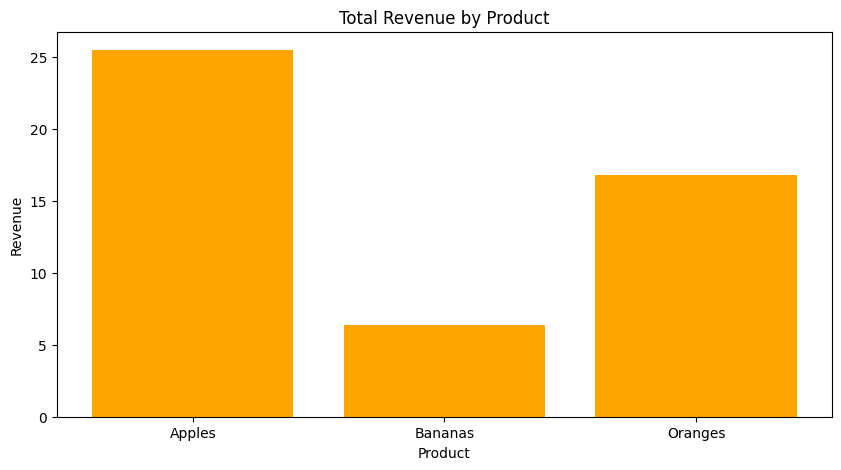

In [28]:
# Plot total revenue
plt.figure(figsize=(10, 5))
plt.bar(df['product'], df['total_revenue'], color='orange')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()

In [38]:
query2 = """
SELECT product, AVG(price) AS avg_price
FROM sales
GROUP BY product
"""
df2 = pd.read_sql_query(query2, conn)
print(" Average Price per Product")
print(df2)


 Average Price per Product
   product  avg_price
0   Apples        1.5
1  Bananas        0.8
2  Oranges        1.2


Text(0, 0.5, 'Average Price')

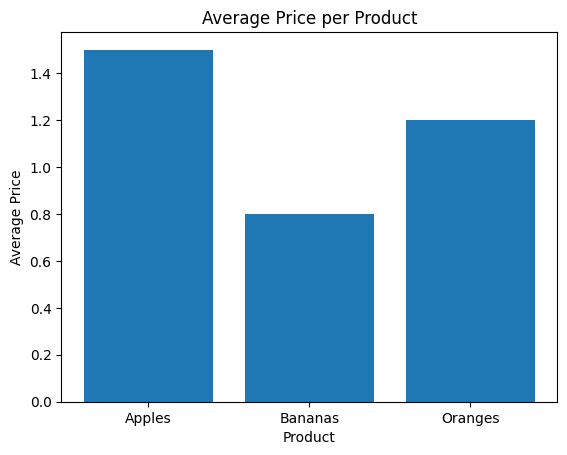

In [53]:
plt.bar(x=df2["product"],height=df2["avg_price"])
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')

In [39]:
query3 = """
SELECT product, SUM(quantity) AS total_qty
FROM sales
GROUP BY product
HAVING total_qty > 10
"""
df3 = pd.read_sql_query(query3, conn)
print("Products Sold More Than 10 Units")
print(df3)


Products Sold More Than 10 Units
   product  total_qty
0   Apples         17
1  Oranges         14


In [ ]:
plt.plot(kind='bar',x=df3[''])